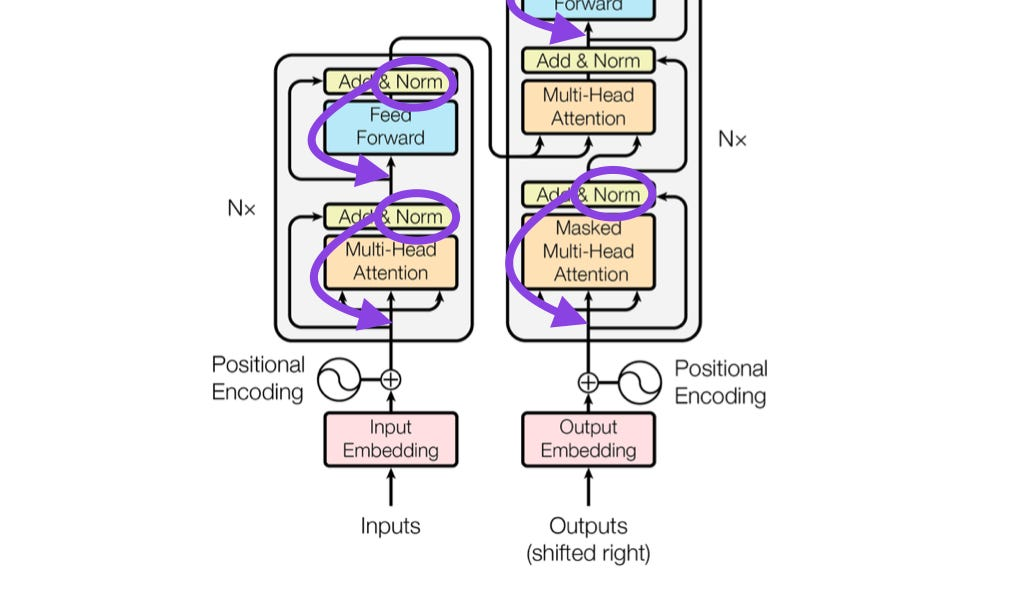

In [14]:
import torch
from torch import nn

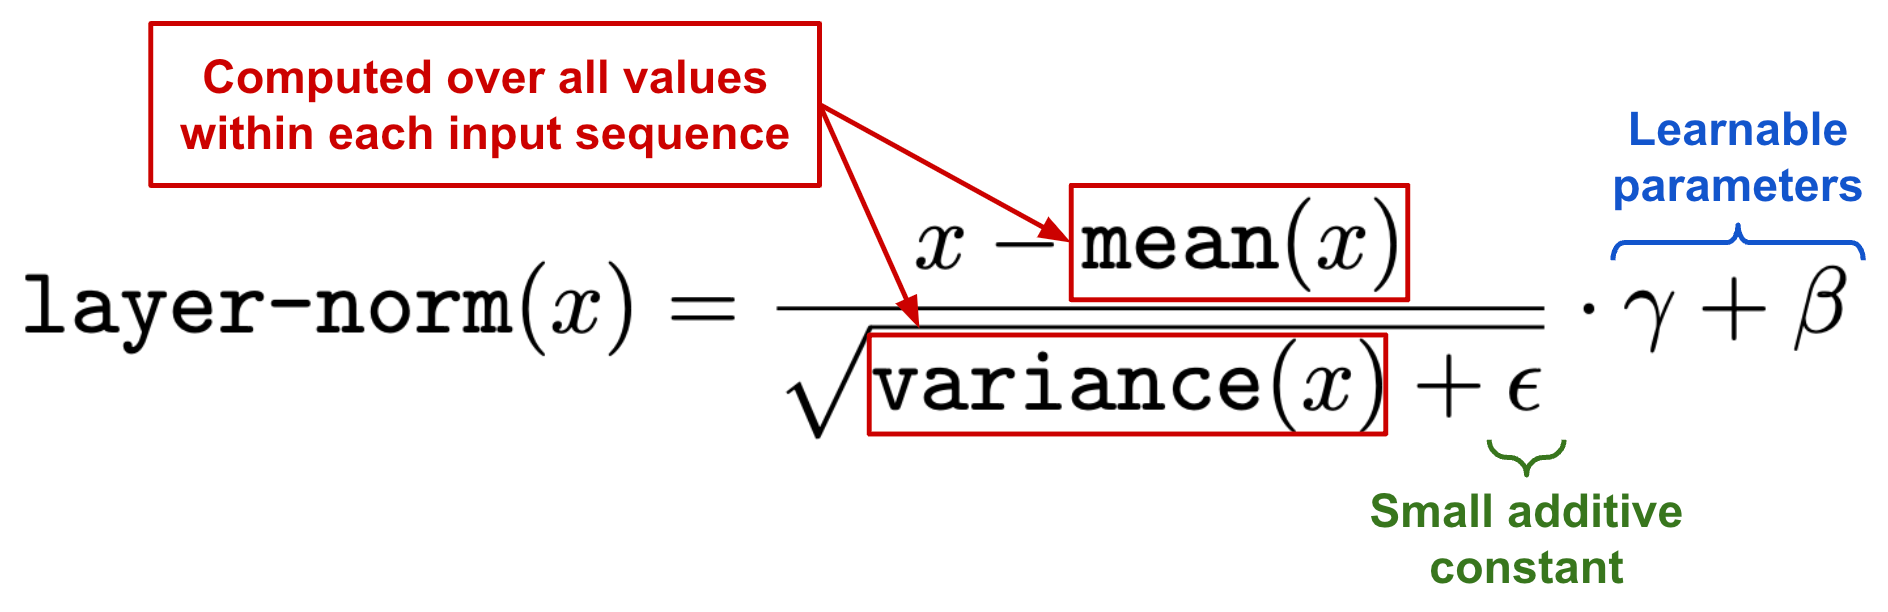

In [19]:
class LayerNormalization():
    def __init__(self,parameter_dim):
        super(LayerNormalization,self).__init__()
        self.parameters_shape = parameter_dim
        self.gamma = nn.Parameter(torch.ones(parameter_dim))
        self.beta = nn.Parameter(torch.zeros(parameter_dim))
        self.eps = 1e-6

    def forward(self,x):
        dims = [-(i + 1) for i in range(len(self.parameters_shape))]
        mean = x.mean(dims,keepdim=True)
        std = x.std(dims,keepdim=True)
        out =  self.gamma * (x - mean) / (std + self.eps) + self.beta
        return out

    

In [21]:
x = torch.randn(2,3,4)
ln = LayerNormalization(x.size())
y = ln.forward(x)
y

tensor([[[-0.0537,  1.1962,  0.6511, -0.7078],
         [ 0.6939,  0.4368, -1.6845,  0.2458],
         [-0.2495, -0.5088,  0.0255,  0.8916]],

        [[-0.2455,  1.6745,  1.0150,  0.0757],
         [-0.9517,  2.0370, -1.3920, -0.1253],
         [-1.3133, -1.3629,  0.6634, -1.0114]]], grad_fn=<AddBackward0>)